In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
df=pd.read_excel(r'Data_Train.xlsx')                     # training data
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [5]:
# since for 80 percent of data infor ation not included lets remove it
df.drop('Additional_Info',axis=1,inplace=True)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


## First lets handle date time data

In [7]:
df['Journey_Day']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey']).dt.month

In [8]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [9]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,3,1


In [10]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,3,1


In [11]:
df['Duration'][0]

'2h 50m'

In [12]:
for i in range(len(df['Duration'])):
    if len(df['Duration'][i].split())!=2:
        if 'h' in df['Duration'][i]:
            df['Duration'][i]=df['Duration'][i].strip()+' 0m'
        else:
            df['Duration'][i]='0h '+df['Duration'][i]
            

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
duration_hrs=[]
duration_mins=[]
for i in range(len(df['Duration'])):
    duration_hrs.append(int(df['Duration'][i].split('h')[0]))
    duration_mins.append(int(df['Duration'][i].split('m')[0].split()[-1]))

In [14]:
df['Duration_hrs']=duration_hrs
df['Duration_mins']=duration_mins

In [15]:
df.drop('Duration',axis=1,inplace=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,3,1,4,45


In [17]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_mins']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df.drop('Dep_Time',axis=1,inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_mins,Dep_hr,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,3897,24,3,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,7662,5,1,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,13882,6,9,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,6218,5,12,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,13302,3,1,4,45,16,50


In [20]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_mins']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [21]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_mins,Dep_hr,Dep_mins,Arrival_hr,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,3,1,4,45,16,50,21,35


In [23]:
# Here if we observe both total stops and route is same, so i will remove route
df.drop('Route',axis=1,inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_mins,Dep_hr,Dep_mins,Arrival_hr,Arrival_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,4,45,16,50,21,35


In [25]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
df['Total_Stops'].replace({'non-stop': 0,'1 stop': 1 ,'2 stops': 2,'3 stops': 3,'4 stops': 4}, inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_mins,Dep_hr,Dep_mins,Arrival_hr,Arrival_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2.0,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,4,45,16,50,21,35


In [28]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

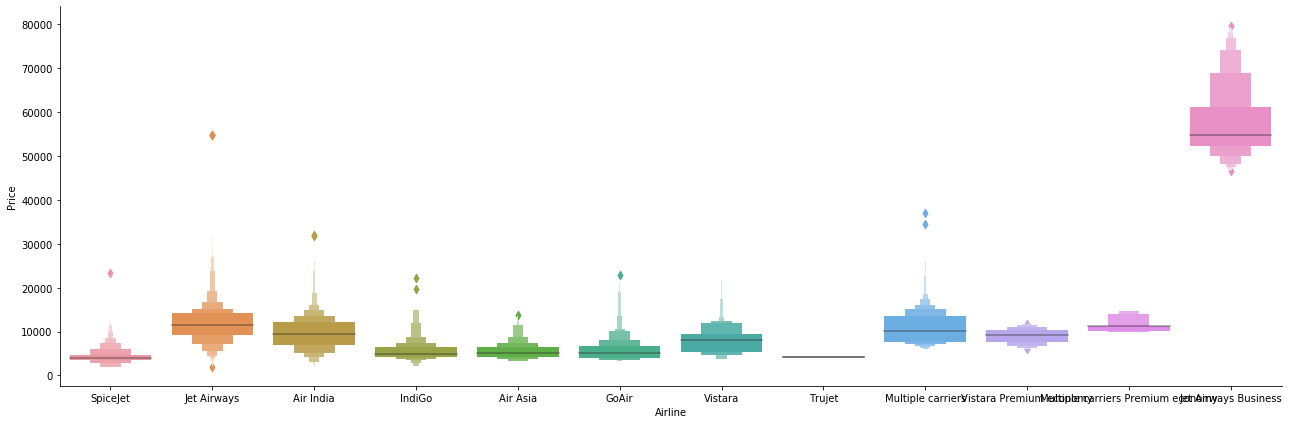

In [29]:
sb.catplot(y='Price',x='Airline',data=df.sort_values('Price'),kind='boxen',height=6,aspect=3)

In [30]:
AirLine=df[['Airline']]
AirLine=pd.get_dummies(AirLine,drop_first=True)

In [31]:
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)

In [32]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)

In [33]:
train=pd.concat([df,AirLine,Source,Destination],axis=1)
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_mins,Dep_hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2,50,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,5,1,7,25,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,19,0,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,5,25,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,4,45,16,...,0,0,0,0,0,0,0,0,0,1


In [34]:
train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [35]:
train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hrs,Duration_mins,Dep_hr,Dep_mins,Arrival_hr,Arrival_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2,50,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,1,7,25,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,6,9,19,0,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,5,12,5,25,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,3,1,4,45,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [36]:
train.shape

(10683, 30)

In [37]:
df1=pd.read_excel(r'Test_set.xlsx')                     # test data


df1.drop('Additional_Info',axis=1,inplace=True)

df1['Journey_Day']=pd.to_datetime(df1['Date_of_Journey']).dt.day
df1['Journey_Month']=pd.to_datetime(df1['Date_of_Journey']).dt.month
df1.drop('Date_of_Journey',axis=1,inplace=True)


for i in range(len(df1['Duration'])):
    if len(df1['Duration'][i].split())!=2:
        if 'h' in df1['Duration'][i]:
            df1['Duration'][i]=df1['Duration'][i].strip()+' 0m'
        else:
            df1['Duration'][i]='0h '+df1['Duration'][i]
duration_hrs=[]
duration_mins=[]
for i in range(len(df1['Duration'])):
    duration_hrs.append(int(df1['Duration'][i].split('h')[0]))
    duration_mins.append(int(df1['Duration'][i].split('m')[0].split()[-1]))
            
df1['Duration_hrs']=duration_hrs
df1['Duration_mins']=duration_mins

df1.drop('Duration',axis=1,inplace=True)


df1['Dep_hr']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_mins']=pd.to_datetime(df1['Dep_Time']).dt.minute
df1.drop('Dep_Time',axis=1,inplace=True)

df1['Arrival_hr']=pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['Arrival_mins']=pd.to_datetime(df1['Arrival_Time']).dt.minute
df1.drop('Arrival_Time',axis=1,inplace=True)

# Here if we observe both total stops and route is same, so i will remove route
df1.drop('Route',axis=1,inplace=True)

df1['Total_Stops'].replace({'non-stop': 0,'1 stop': 1 ,'2 stops': 2,'3 stops': 3,'4 stops': 4}, inplace=True)

AirLine=df1[['Airline']]
AirLine=pd.get_dummies(AirLine,drop_first=True)
Source=df1[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Destination=df1[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)

test=pd.concat([df1,AirLine,Source,Destination],axis=1)

test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [38]:
test.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_hrs,Duration_mins,Dep_hr,Dep_mins,Arrival_hr,Arrival_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,10,55,17,30,4,25,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,4,0,6,20,10,20,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,23,45,19,15,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,13,0,8,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,50,23,55,2,45,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
test.shape

(2671, 28)

In [40]:
set(train.columns)-set(test.columns)

{'Airline_Trujet', 'Price'}

In [41]:
test.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Duration_hrs',
       'Duration_mins', 'Dep_hr', 'Dep_mins', 'Arrival_hr', 'Arrival_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

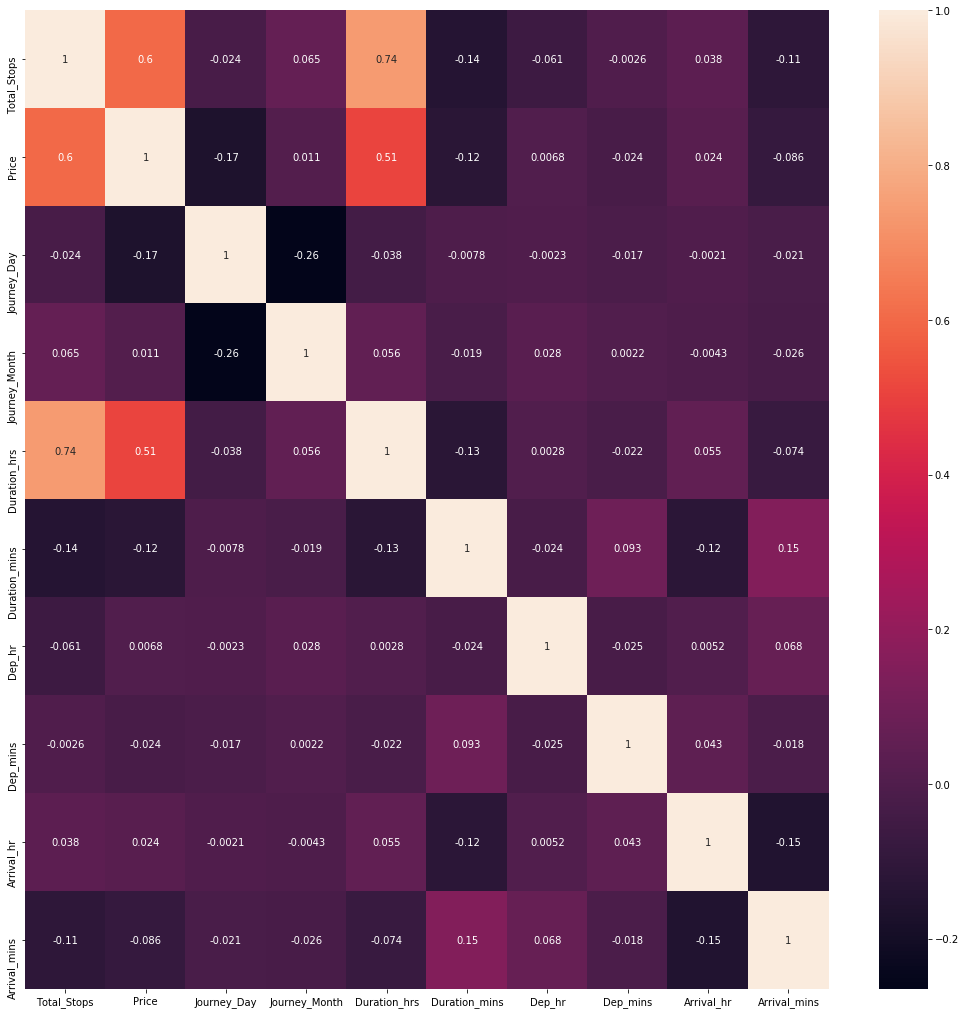

In [42]:
plt.figure(figsize=(18,18))
sb.heatmap(df.corr(),annot=True)

In [43]:
train.dropna(inplace=True)
y=train['Price']
x=train.drop('Price',axis=1)

In [44]:
x.dropna(inplace=True)

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [46]:
selection.feature_importances_

array([2.13942907e-01, 1.10048790e-01, 8.40774629e-02, 1.33007076e-01,
       1.75865573e-02, 2.50522593e-02, 2.19537048e-02, 2.85803187e-02,
       2.08316675e-02, 9.89389749e-03, 1.78277396e-03, 1.64245222e-02,
       1.42915884e-01, 6.76679456e-02, 1.80188811e-02, 9.93185511e-04,
       2.94988150e-03, 9.30114466e-05, 5.12195082e-03, 1.38375121e-04,
       5.24980019e-04, 1.39935961e-02, 4.32621240e-03, 5.89025281e-03,
       1.06228902e-02, 1.46101506e-02, 5.92436805e-03, 5.24675921e-04,
       2.25018216e-02])

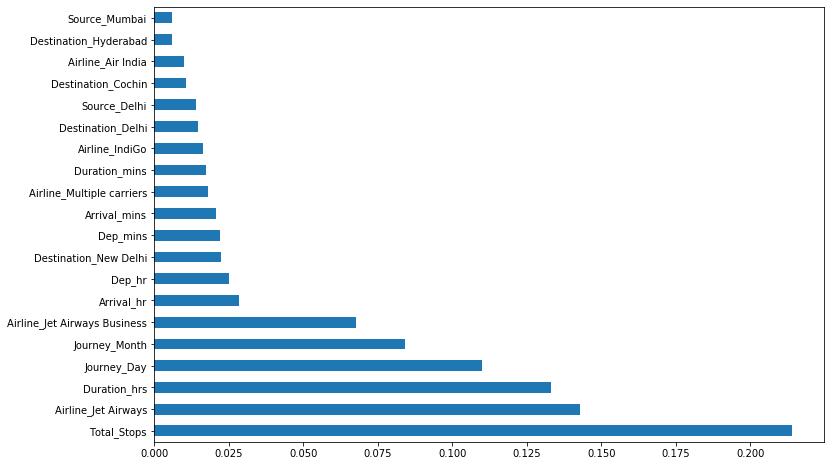

In [47]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [48]:
test['Airline_Trujet']=0

In [49]:
test.shape

(2671, 29)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
import pickle 

r2_train_score=[]
r2_test_score=[]
mse=[]

def generalized_model(model,train_x,test_x,train_y,test_y,filename):
    
    # FITTING THE MODEL
    model.fit(train_x,train_y)
    
    #PREDICTING THE TRAIN DATA TO SEE WHETHER THE MODEL IS OVERFIT OR NOT
    y_pred=model.predict(train_x)
    R2_train_model=r2_score(train_y,y_pred)
    r2_train_score.append(round(R2_train_model,2))

    #PREDICTING THE TEST DATA TO SEE THE MODEL'S ACCURACY
    y_pred=model.predict(test_x)
    R2_test_model=r2_score(test_y,y_pred)
    r2_test_score.append(round(R2_test_model,2))
    
    mse_error=mean_squared_error(test_y,y_pred)
    mse.append(mse_error)
    # MODEL EVALUATION
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("mean sqauared error:",round(mse_error,2))
  
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sb.distplot(test_y-y_pred)  #checking the distribution
    plt.subplot(1,2,2)
    plt.scatter(test_y,y_pred)    # checking scatter plot 
    
    plt.show()
    
    file=open(filename,'wb')
    pickle.dump(model,file)
    file.close()
    
    return model

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Train R2-score : 0.95
Test R2-score : 0.79
mean sqauared error: 4558223.73


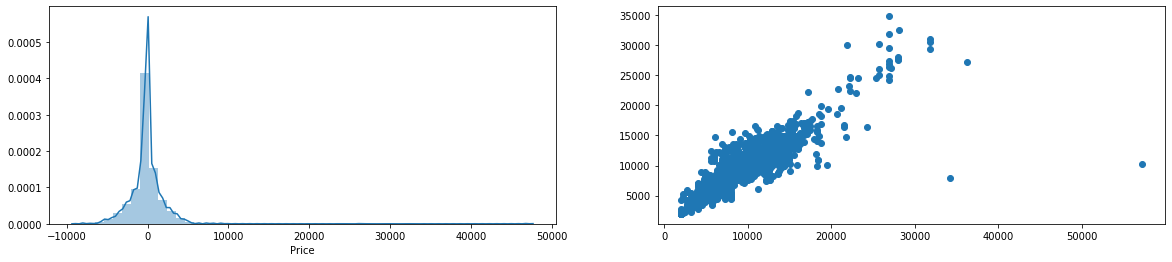

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
model1=RandomForestRegressor(n_estimators=100)
generalized_model(model1,X_train, X_test, y_train, y_test,'rf.pkl')

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_sample_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]


In [57]:
params={'n_estimators': n_estimators,
       'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_sample_split,
        'min_samples_leaf': min_samples_leaf
       }

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Train R2-score : 0.92
Test R2-score : 0.8
mean sqauared error: 4209692.99


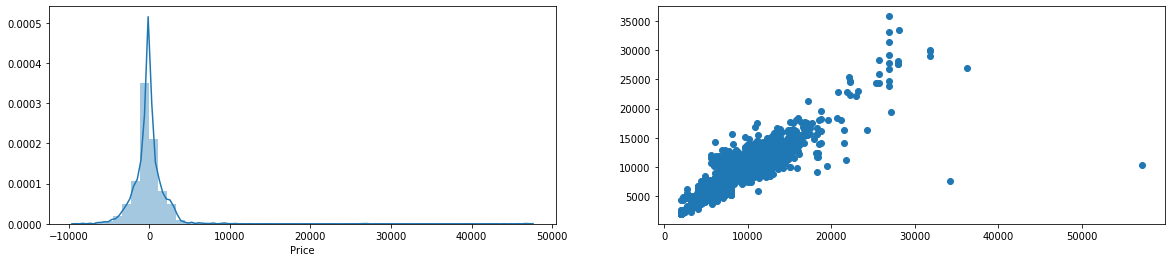

In [58]:
reg=RandomForestRegressor()
modelrf_rscv=RandomizedSearchCV(reg,params,scoring='r2',n_iter=10,cv=5,verbose =2,n_jobs=-1,random_state=0)
fitted_model=generalized_model(modelrf_rscv,X_train,X_test,y_train,y_test,'rf_ht.pkl')